# Stock Market Analysis Project

## Introduction
This is a **developing project on the CNBC's "Magnificent Seven" stocks**, which is a coined term used to group seven of the most influential technology companies in the current U.S. stock market. 
The ultimate goal of this project is to come up with models that can closely predict the future prices of the Magnificent Seven stocks with modern algorithms. 
But for now, I plan to start from the basics and learn my way towards the goal. 

I will be working with data from Yahoo Finance and applying analytical skills to surface several insights along the process. 

### Overview of the Current Work
- **1. Deciding on which attributes to use for the stock performance analysis**
    - Closing Price vs. Daily Return vs. Trading Volume
- **2. Analyzing the growth of each stocks with Expected Return**
    - Expected Return to measure Volatility/Risk
    - Calculating the risk of stocks based on performance history for the past 3 years
- **3. Exploring Simple Moving Average (SMA) as a technical analysis indicator**

### Overview of Future Directions
- Exploring other technical analysis indicators
    - Convergence Divergence Moving Average (MACD)
    - Relative Strength Index (RSI)
- Building predictive models with modern algorithms
    - Support Vector Machines (SVM)
    - Long Short-Term Memory (LSTM)
    - Artifical Neural Networks (ANN)

## Setting up DataFrame

In [ ]:
# Installing required libraries
%pip install numpy pandas matplotlib seaborn
%pip install -q yfinance

In [3]:
# Importing modules
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt      
import seaborn as sns              


In [4]:
import yfinance as yf
from datetime import datetime

# Setting up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

# The Magnificent 7 stocks
stock_ticker_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'META']
stock_info_list = []
stock_info_period_list = []

# Grabbing Yahoo ticker object
for stock in stock_ticker_list:
    stock_info_list.append(yf.Ticker(stock))

# Grabbing stock history of Yahoo ticker objects using time period
for stock in stock_info_list:
    stock_info_period_list.append(stock.history(start=start, end=end))

# Combining the information of the stocks with the company name
for stock, company in zip(stock_info_period_list, stock_ticker_list):
    stock['Company'] = company

df = pd.concat(stock_info_period_list, axis=0)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2022-01-14 00:00:00-05:00,168.578541,170.979219,168.332571,170.280670,80440800,0.0,0.0,AAPL
2022-01-18 00:00:00-05:00,168.745802,169.759200,166.679656,167.063370,90956700,0.0,0.0,AAPL
2022-01-19 00:00:00-05:00,167.260178,168.322774,163.265614,163.550934,94815000,0.0,0.0,AAPL
2022-01-20 00:00:00-05:00,164.288820,166.945302,161.533944,161.858627,91420500,0.0,0.0,AAPL
2022-01-21 00:00:00-05:00,161.770096,163.649317,159.684268,159.792496,122848900,0.0,0.0,AAPL


In [5]:
# Checking how many 'useful' values are present in the columns 'Dividends' and 'Stock Splits'
print(df.shape)
print(df[df['Dividends'] > 0.0].shape)
print(df[df['Stock Splits'] > 0.0].shape)  

(5257, 8)
(43, 8)
(4, 8)


## Descriptive Statistics of Individual Stocks


In [6]:
# Assign the historical data to variables
AAPL, GOOG, MSFT, AMZN, TSLA, NVDA, META = stock_info_period_list

# Describe the historical data for NVDA
NVDA.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,751.000000,751.000000,751.000000,751.000000,7.510000e+02,751.000000,751.000000
mean,55.527650,56.557596,54.388630,55.513311,4.624445e+08,0.000088,0.013316
std,43.036517,43.737361,42.118724,42.931018,1.683799e+08,0.000764,0.364905
min,10.960222,11.723472,10.802377,11.215972,1.051570e+08,0.000000,0.000000
25%,19.410469,19.961206,18.871275,19.542802,3.584000e+08,0.000000,0.000000
50%,42.233829,42.878537,41.630097,42.282806,4.494050e+08,0.000000,0.000000
75%,89.222886,90.602060,87.014412,88.747005,5.496925e+08,0.000000,0.000000
max,153.029999,153.130005,147.820007,149.429993,1.543911e+09,0.010000,10.000000


**- In the past 3 years, 752 days were open for trading.**

**- Since we're looking at 7 stocks, the length of the table (5264) checks out as 752 * 7 = 5264**

In [7]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 751 entries, 2022-01-14 00:00:00-05:00 to 2025-01-13 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          751 non-null    float64
 1   High          751 non-null    float64
 2   Low           751 non-null    float64
 3   Close         751 non-null    float64
 4   Volume        751 non-null    int64  
 5   Dividends     751 non-null    float64
 6   Stock Splits  751 non-null    float64
 7   Company       751 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 52.8+ KB


## 1. Closing Price vs. Daily Return vs. Trading Volume

### Closing Price
- Closing price is an obvious benckmark to track stock performance over time.
- Traders often use closing prices in technical analysis to identify trends and trading signals. [(Source)](https://cbonds.com/glossary/last-price/)
- **However, price has the caveat of rising over time due to inflation.** This means the upper limit of price is very likely to be re-adjusted to a higher value. Therefore, **while it may be a good short-term indicator of stock performance, it won't be a great long-term indicator of stock performance.**


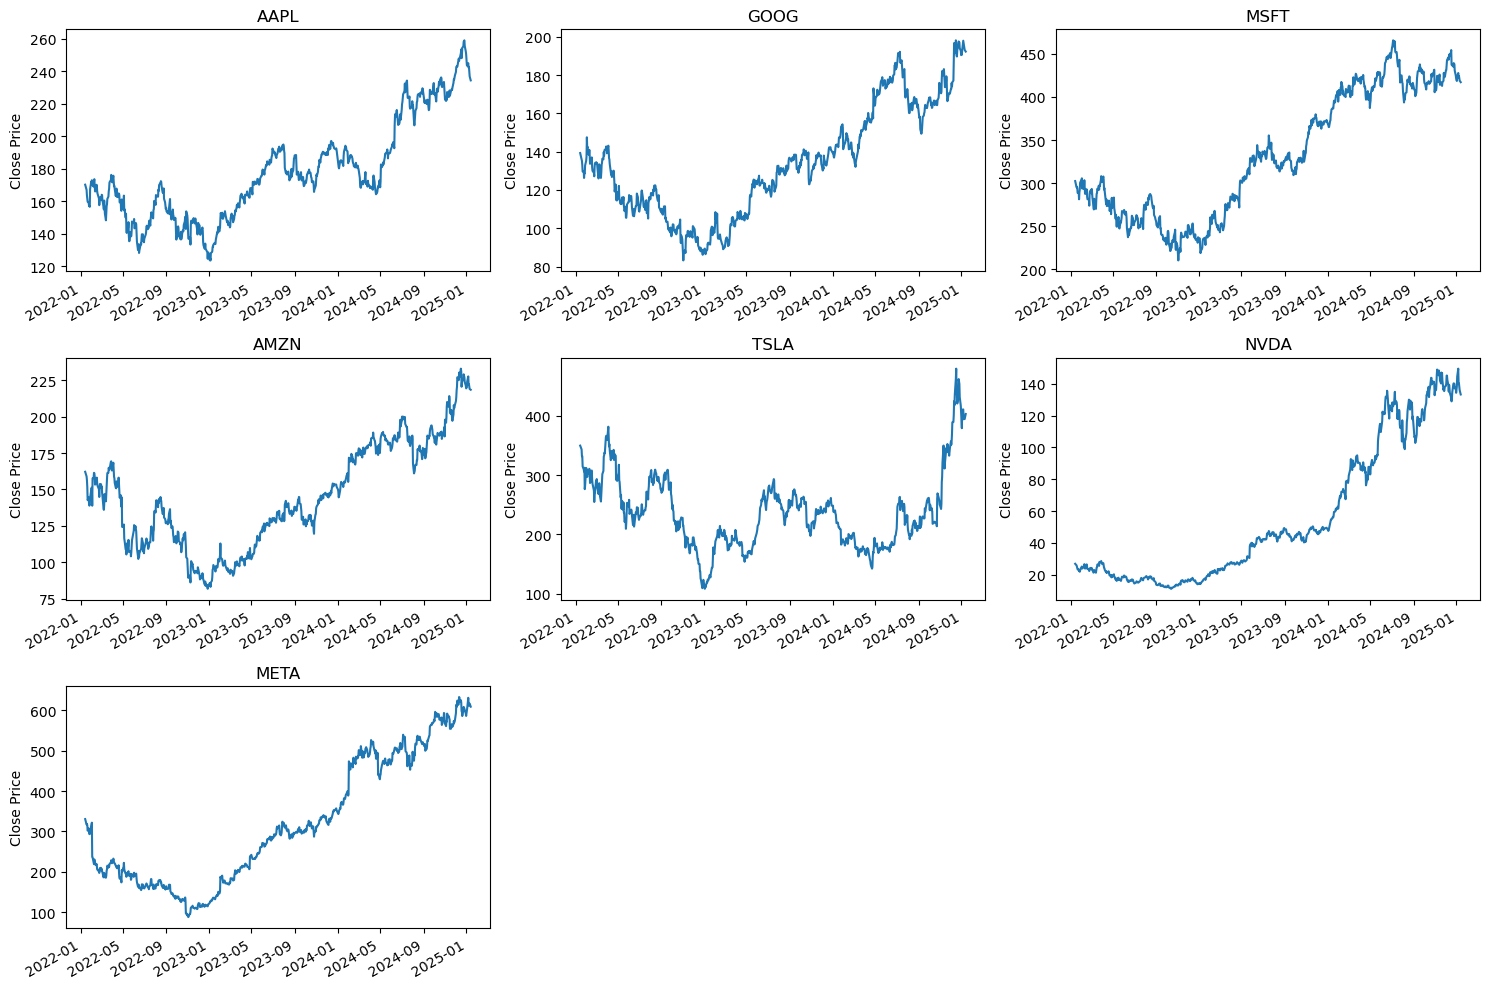

In [8]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    stock['Close'].plot()
    plt.title(stock_ticker_list[i - 1])
    plt.ylabel('Close Price')
    plt.xlabel(None)

plt.tight_layout()
plt.show()


### Daily Return
- Instead of price, the changes in prices can be used to indicate stock performance. 
- A common measure of changes in stock price is Daily Return. 
- Daily return is calculated by:  <br>

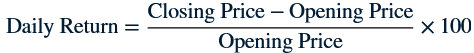      [(Source)](https://www.investopedia.com/terms/i/intraday-return.asp)

- However, a simpler version can be used: 

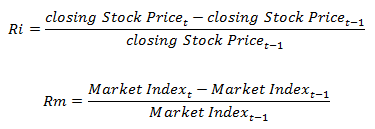      [(Source)](https://advfinangelinvestor.wordpress.com/2012/04/02/how-to-calculate-daily-stock-returns-and-daily-market-returns/)

- **Daily return is a solid indicator of performance as it reduces the noise from inflation**, subsequently having a tighter range of values to represent performance.
- It is **useful for statistical analysis** as it will most likely have a **baseline.** 


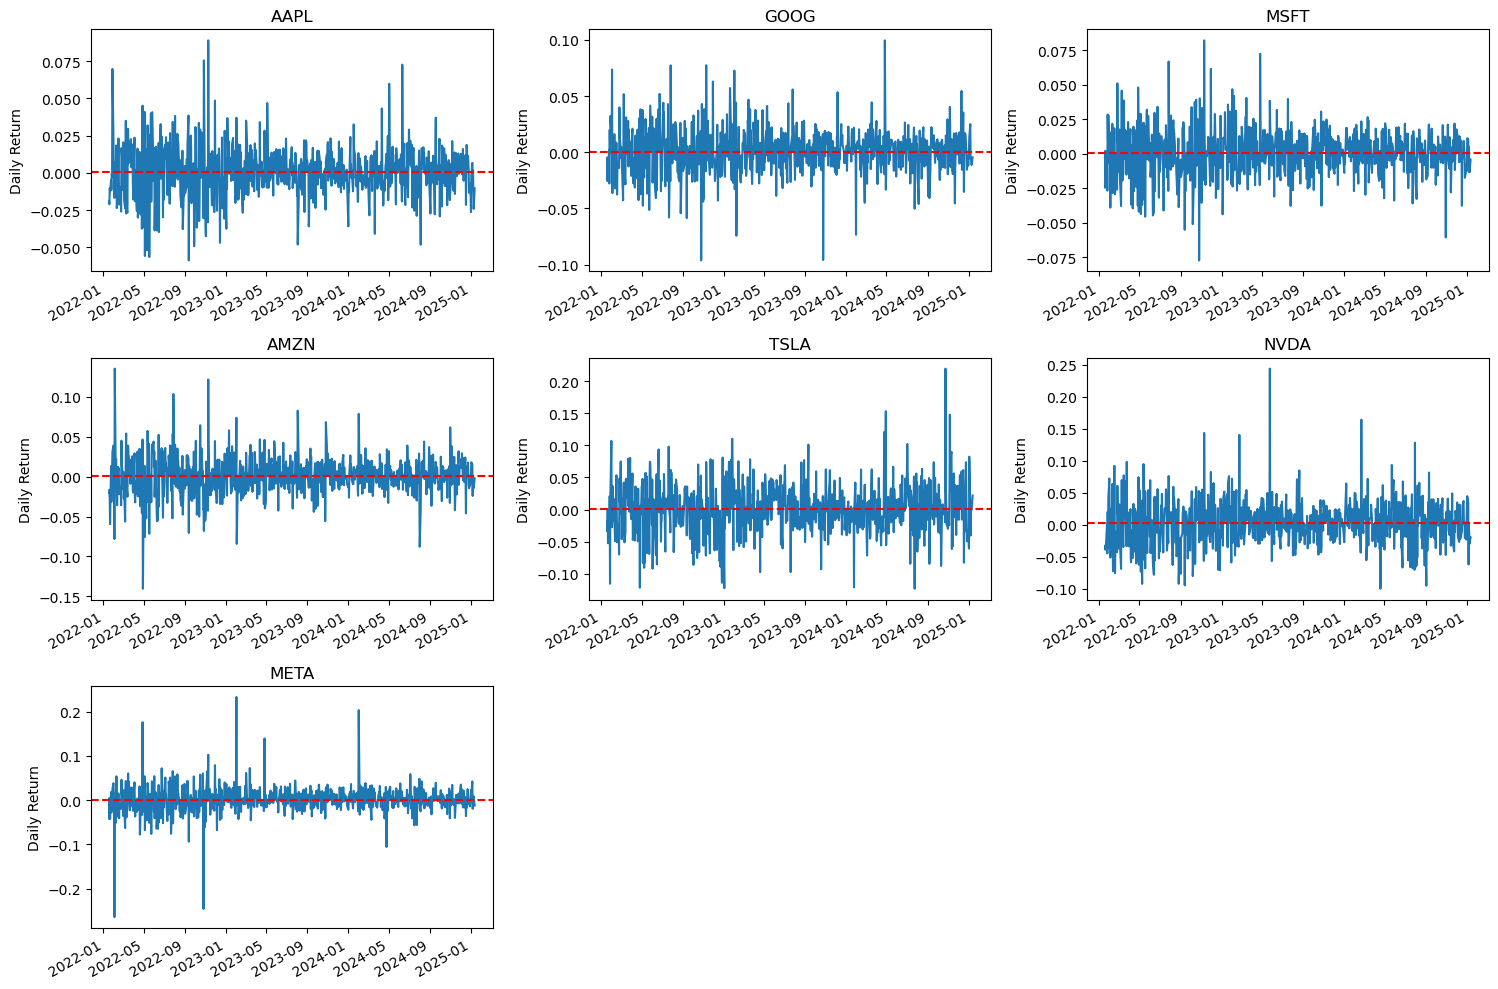

In [9]:
for stock in stock_info_period_list:
    stock['Daily Return'] = stock['Close'].pct_change()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    stock['Daily Return'].plot()
    plt.axhline(y=stock['Daily Return'].mean(), color='r', linestyle='--')  
    plt.title(stock_ticker_list[i - 1])
    plt.ylabel('Daily Return')
    plt.xlabel(None)

# Drawing a line at the average daily return for each plot

plt.tight_layout()
plt.show()

### Trading Volume
- Trading volume is the number of an asset or security that has been exchanged over a period of time.
- Trading volume is considered a solid indicator as well as it shows market's enthusiasm for the stock.
    - It is commonly used to confirm or refute a trend of stock in a market. [(Source)](https://www.schwab.com/learn/story/trading-volume-as-market-indicator)
- However, **instead of having analysis centered around a baseline, resistance and support lines are used to make analysis with trading volume.**
    - *The resistance and support lines drawn here are NOT accurate*. These were drawn for explanation purpose only.


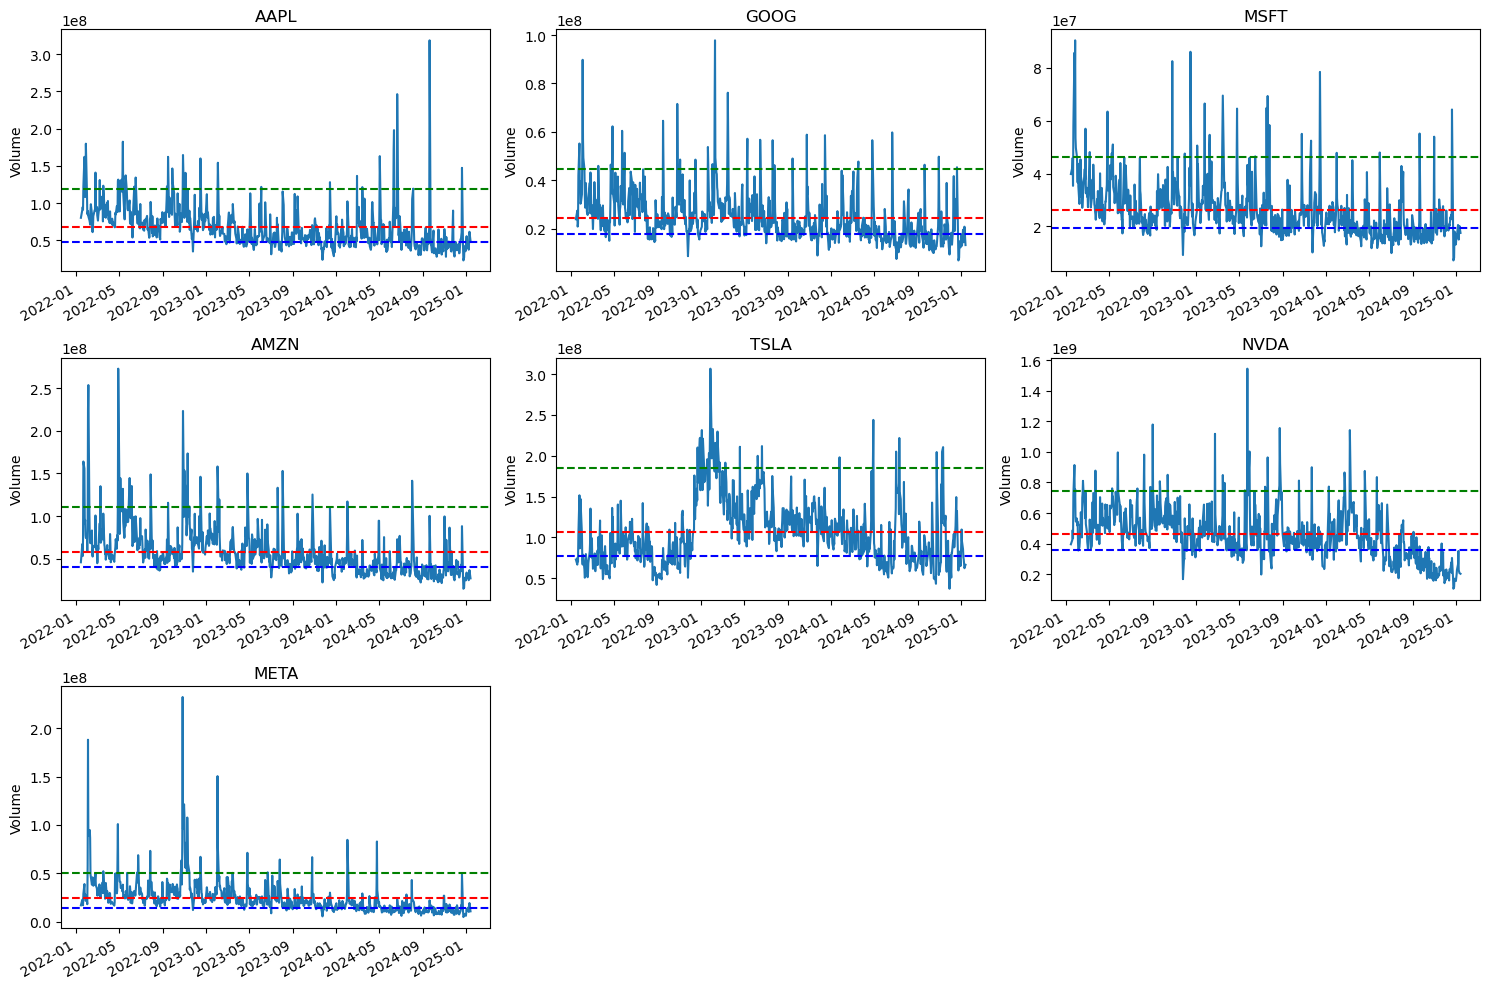

In [10]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    stock['Volume'].plot()
    plt.axhline(y=stock['Volume'].mean(), color='r', linestyle='--')    
    plt.axhline(y=stock['Volume'].quantile(0.95), color='g', linestyle='--', label='Upper Quartile')
    plt.axhline(y=stock['Volume'].quantile(0.25), color='b', linestyle='--')
    plt.title(stock_ticker_list[i - 1])
    plt.ylabel('Volume')
    plt.xlabel(None)

plt.tight_layout()
plt.show()


## Conclusion
- Although each of the three indicators have their merits in providing insights, **Daily Return seems to be the best indicator of stock performance as it has a baseline to work with in analysis.**

## 2. Expected Daily Return to measure Growth of Stocks
- **Using the Expected value of Daily Return over a time period, we can measure the growth of each individual stocks.**
- The Expected value of Daily Return over a time period can be analyzed on a kernel density estimate plot made from a histogram.
- This **Expected value of Daily Return can be measured by the standard deviation away from the baseline**.


In [11]:
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Daily Return
Date,,,,,,,,,
2022-01-14 00:00:00-05:00,320.565451,331.463821,319.987641,330.636963,16868500,0.0,0.0,META,NaN
2022-01-18 00:00:00-05:00,322.059755,322.976237,316.431262,316.939301,22645600,0.0,0.0,META,-0.041428
2022-01-19 00:00:00-05:00,318.363869,325.855272,318.114820,318.373840,20814700,0.0,0.0,META,0.004526
2022-01-20 00:00:00-05:00,322.667442,326.572539,314.777598,315.355377,16925000,0.0,0.0,META,-0.009481
2022-01-21 00:00:00-05:00,313.612016,317.098697,301.886817,302.016327,28710700,0.0,0.0,META,-0.042298


### Generating distribution of Daily Returns for Each Stock

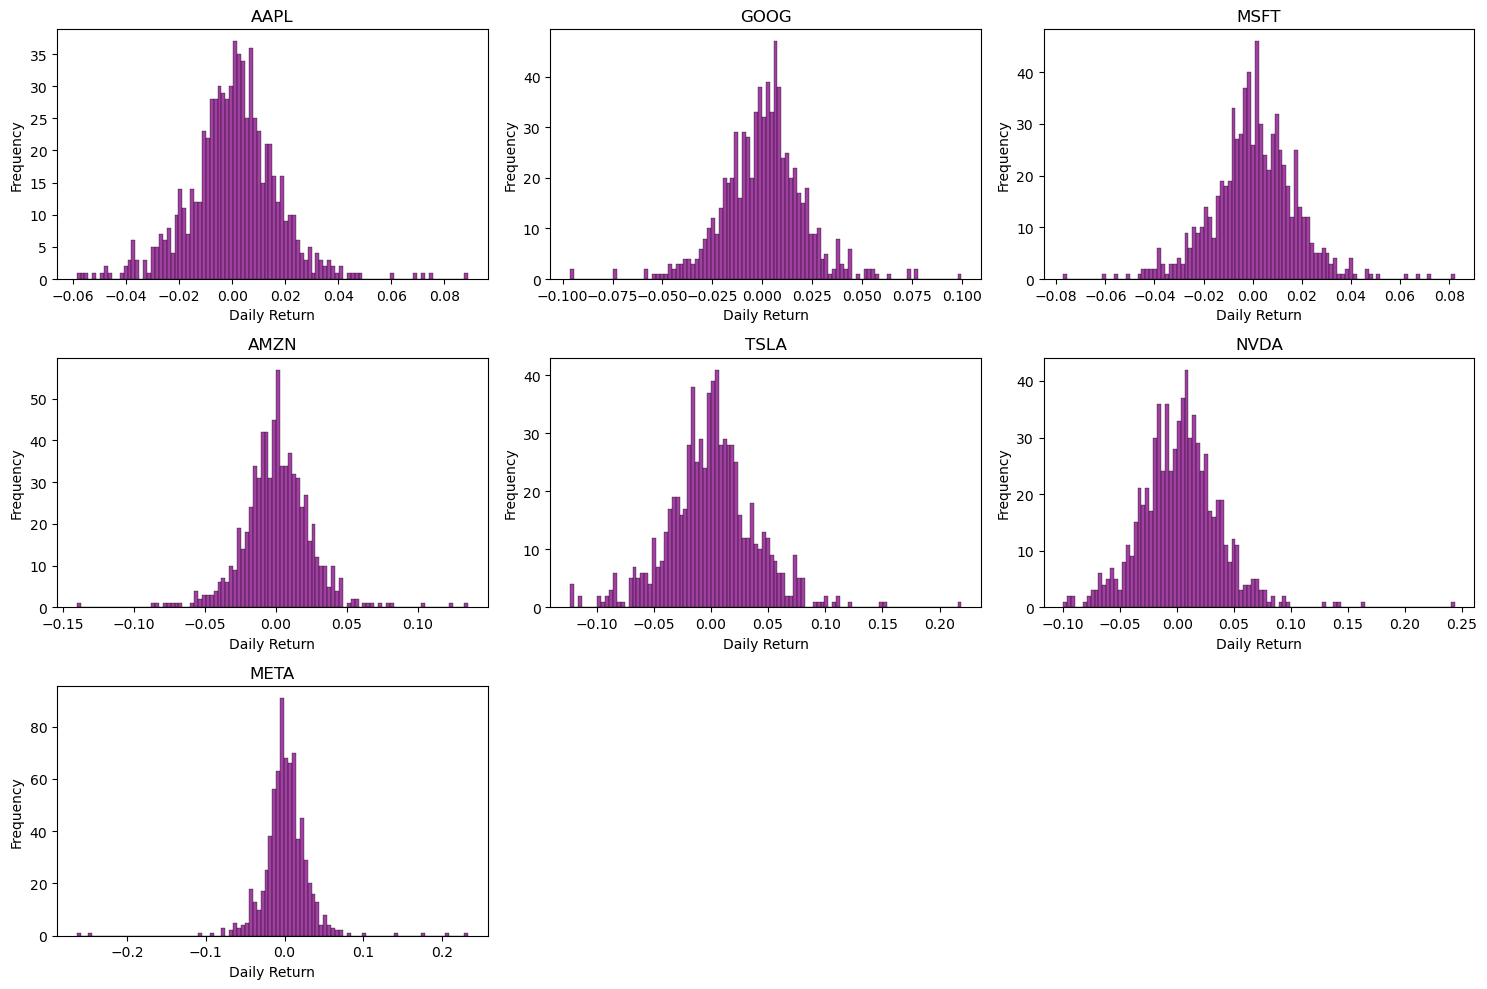

In [12]:
plt.figure(figsize=(15, 10))

for i, stock in enumerate(stock_info_period_list, 1):
    plt.subplot(3, 3, i)
    sns.histplot(stock['Daily Return'].dropna(), bins=100, color='purple')
    plt.title(f'{stock_ticker_list[i - 1]}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
# Create a new dataframe with the daily returns of each stock
df2 = pd.concat([stock['Daily Return'] for stock in stock_info_period_list], axis=1)
df2.columns = stock_ticker_list

df2.head()

,AAPL,GOOG,MSFT,AMZN,TSLA,NVDA,META
Date,,,,,,,
2022-01-14 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-18 00:00:00-05:00,-0.018894,-0.025010,-0.024339,-0.019863,-0.018197,-0.038564,-0.041428
2022-01-19 00:00:00-05:00,-0.021025,-0.004685,0.002247,-0.016477,-0.033828,-0.032274,0.004526
2022-01-20 00:00:00-05:00,-0.010347,-0.015816,-0.005703,-0.029632,0.000623,-0.036582,-0.009481
2022-01-21 00:00:00-05:00,-0.012765,-0.025576,-0.018468,-0.059502,-0.052566,-0.032132,-0.042298


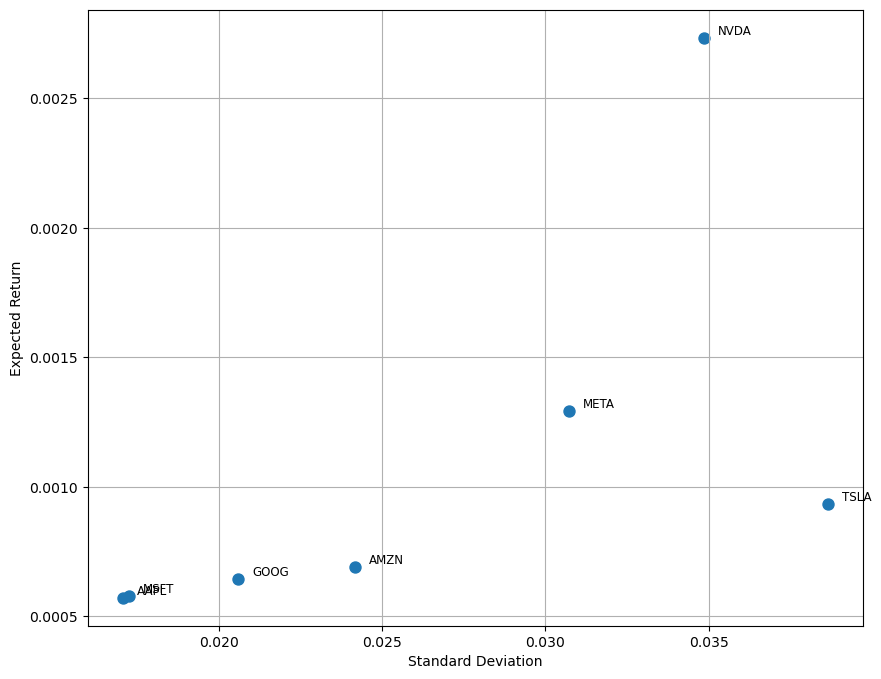

In [14]:
# First date is dropped because it has a NaN value
df2 = df2.dropna()

area = np.pi * 20  # Set the size of the points

plt.figure(figsize=(10, 8))
# Create a scatter plot for the daily return of the stock
plt.scatter(df2.std(), df2.mean(), s=area)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.grid(True)

for label, x, y in zip(df2.columns, df2.std(), df2.mean()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(10, 5),  
        textcoords='offset points', ha='left', va='center', fontsize=8.5)

plt.show()

## Interpretation

### Growth
- **All of the Magnificent 7 Stocks experienced positive growth**, as evidenced by the positive expected daily return over the past 3 years. 

### Volatility / Risk in Investment
[(Source)](https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp)
- A small expected return and low standard deviation indicates an investment with a "relatively" low potential for profit, but also with a very little risk.
- A high expected return and high stndard deviation indicates an investment with a "relatively" high potential for profit, but also with a very high risk. <br> <br>

- Based on the data of Daily Returns over the past 3 years, **AAPL and MSFT can be considered to be very safe stocks to invest in.**
- On the other hand, **NVDA experienced relatively explosive growth over the past 3 years, but this result is considered volatile** as it is relatively far away from the mean as evidenced by the standard deviation. 


## 3. Exploring Simple Moving Average (SMA)
- Simple Moving Average (SMA) is a common technical analysis indicator used to visualize a trend of stock price by filtering out fluctuations in price. [(Source)](https://www.investopedia.com/terms/m/movingaverage.asp)
- The Moving Average allows traders to focus on the overall direction of the stock trend in the market.

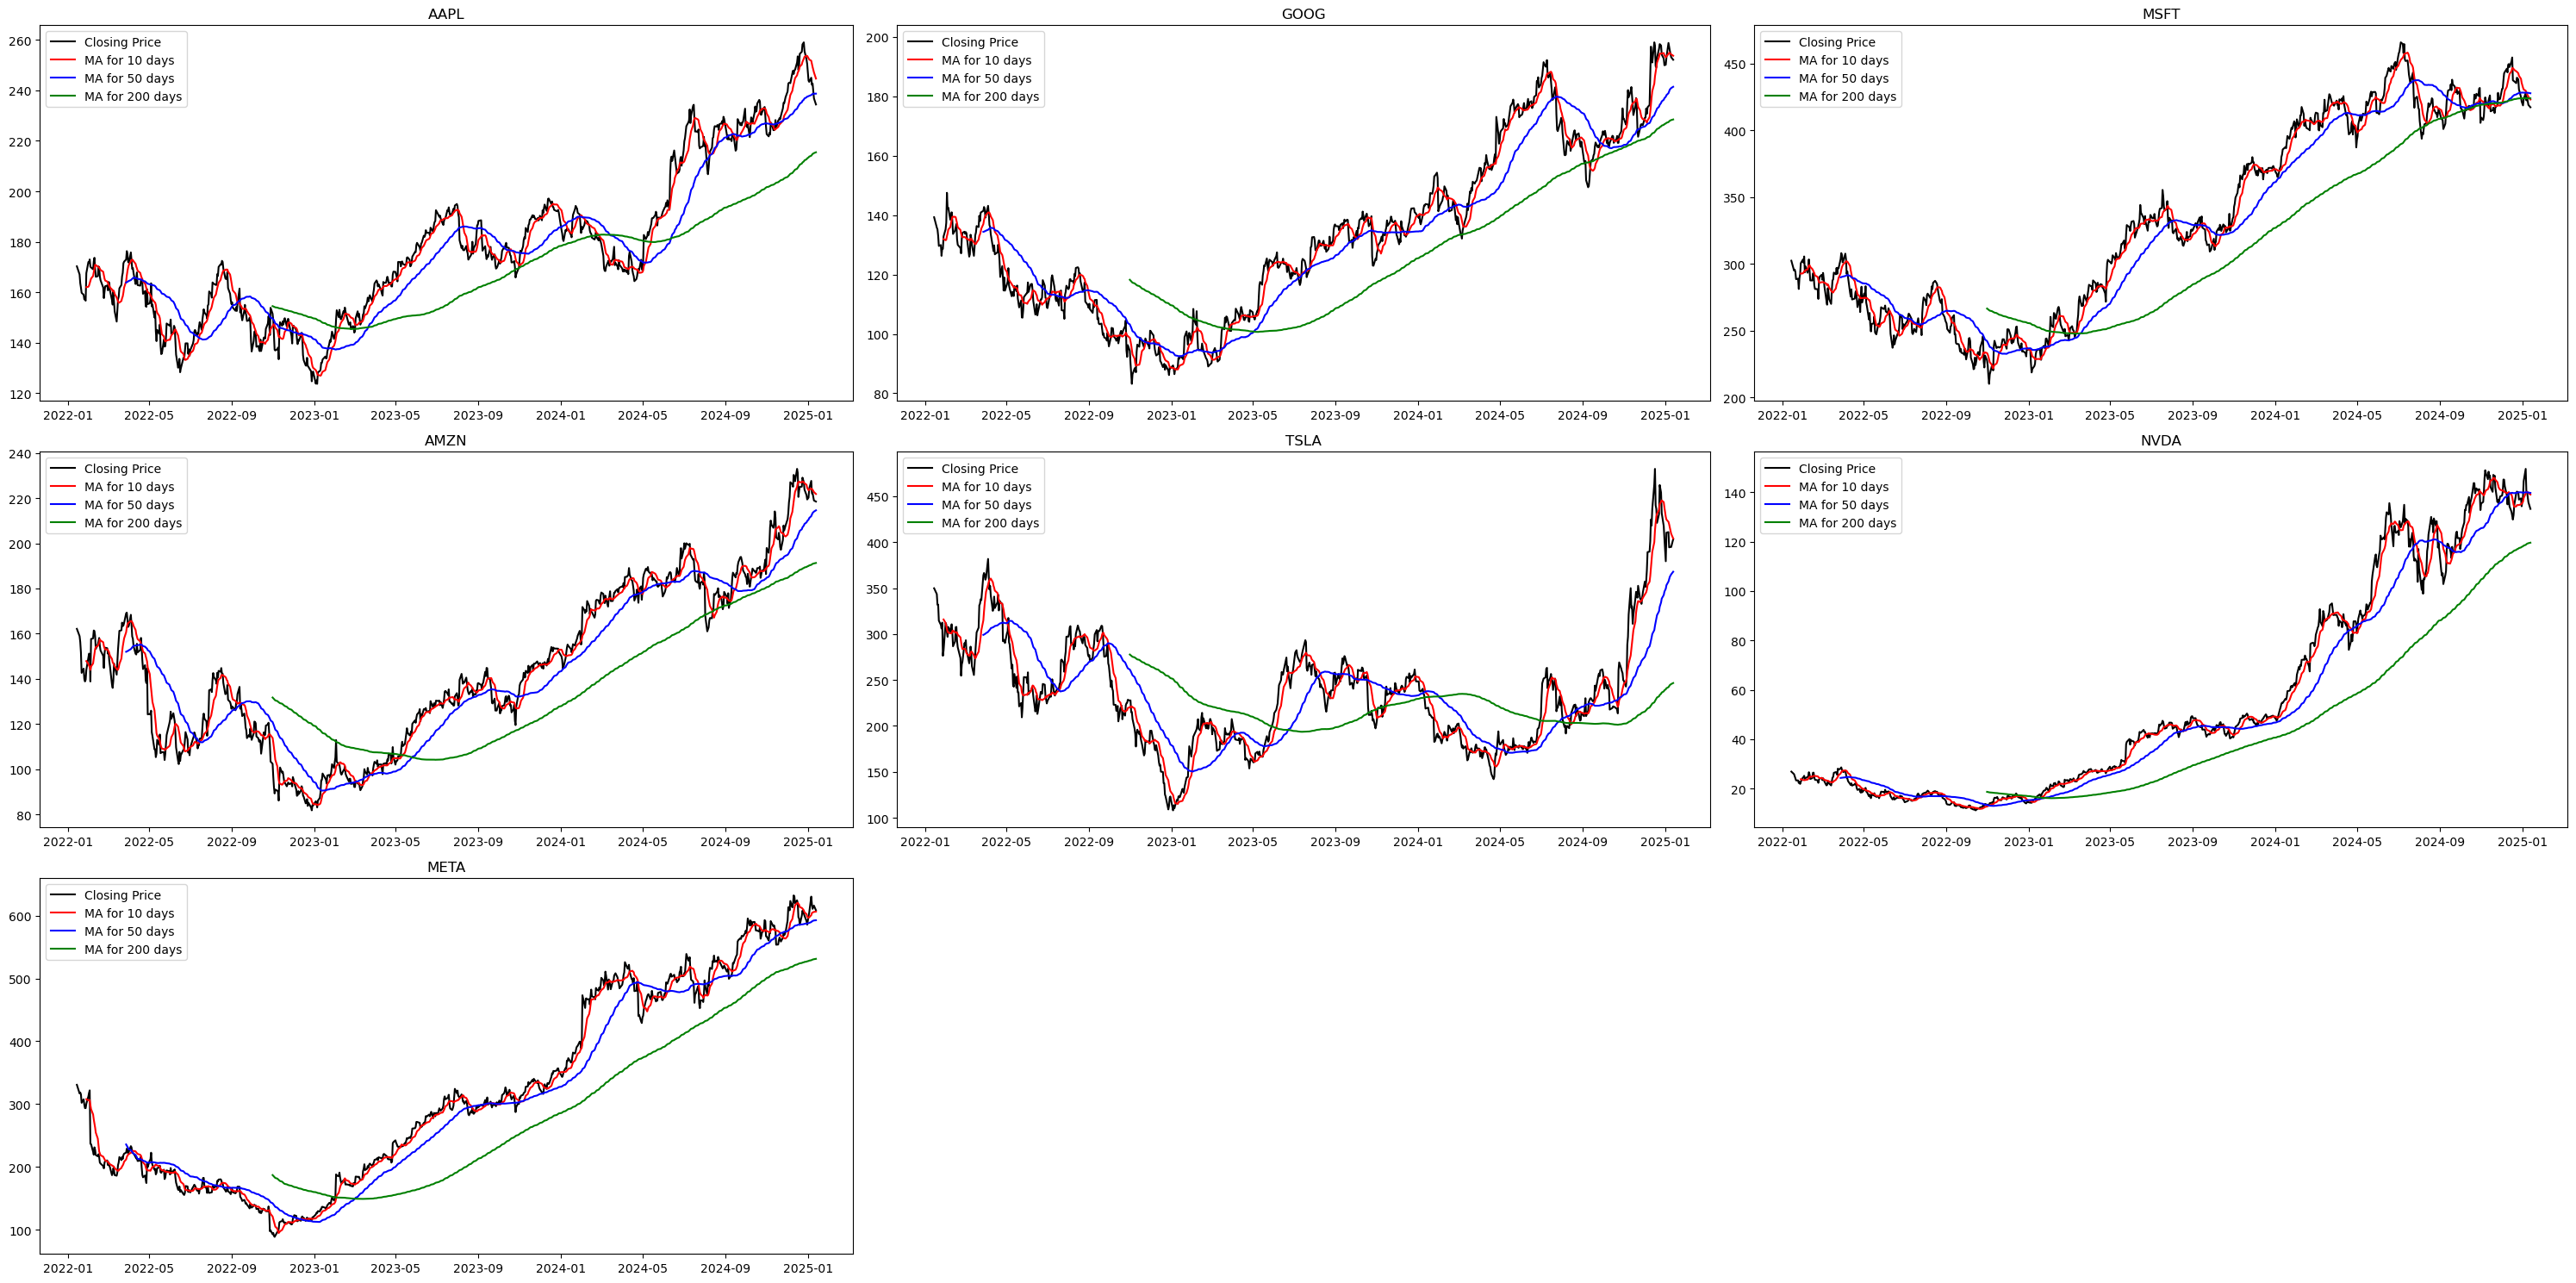

In [18]:
ma_periods = [10,50,200]

# for each stock in the list, calculate the moving average for the specified periods
for ma in ma_periods:
    for stock in stock_info_period_list:
        column_name = f'MA for {ma} days'
        stock[column_name] = stock['Close'].rolling(window=ma).mean()

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(30)

for i, stock in enumerate(stock_info_period_list,1):
    plt.subplot(3,3,i)
    plt.plot(stock['Close'], label='Closing Price', color='black')
    plt.plot(stock['MA for 10 days'], label='MA for 10 days', color='red')
    plt.plot(stock['MA for 50 days'], label='MA for 50 days', color='blue')
    plt.plot(stock['MA for 200 days'], label='MA for 200 days', color='green')
    plt.title(f'{stock_ticker_list[i-1]}')
    plt.legend()

# removing the extra subplots
for i in range(len(stock_info_period_list), 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



        

## Interpretation
- The SMA calculation requires a certain number of data points to compute the average. 10-day SMA requires 10 closing prices to compute the average, meaning that the first 9 days will not have a SMA value because there are not enough data points to compute the average.
- Commonly, 50-day and 200-day SMAs are used to identify long-term trends. [(Source)](https://www.investopedia.com/terms/m/movingaverage.asp)
<br>

- **After September 2023, all of the Magnificent 7 stocks showed an upward trend, with the exception of Tesla.**
- Therefore, **Tesla seems to be a stock that is hard to invest at the moment** as it is hard to predict its future price using SMA. 